<a href="https://colab.research.google.com/github/Marceline37/Test1/blob/main/Evaluation_R%C3%A9sultat_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dev IA - Evaluation n°1 - Mars 2022
Ceci est un point d'étape pour évaluer les compétences acquises à ce stade. 
  
Faites une copie de ce notebook, modifiez-le librement puis partager votre travail en fin de session sur Simplonline (veuillez vous assurer que les accès à votre document sont autorisés à des tiers).


## Objectifs
Pour toute les étapes ci-dessous il vous est demandé d'**argumenter vos choix** et d'**expliquer les résultats** obtenus.

* Réaliser une EDA (Exploratory Data Analysis) sur le jeu de données
  - Descrire les données
  - Réaliser une analyse univariée et bivariée

* Réaliser le preprocessing des données
  - Gérer les données manquantes
  - Procéder à la normalisation / encodage

* Entrainer un modèle d'apprentissage supervisé
  - Choisir un modèle répondant aux objectifs du projet
  - Définir les paramètres du modèle
  - Utiliser la validation croisée

* Evaluer le modèle
  - Choisir la ou les métriques d'erreur
  - Valider les performances obtenues

* Conclure
  - Réalisation du projet
  - Difficultés
  - Performance
  - ...


## Bonus
Pour ceux qui veulent aller plus loin, vous pouvez notamment :

* Utiliser un Pipeline
* Procéder à une recherche exhaustive des hyper-paramètres (grid search)
* Procéder à une comparaison de modèles
* Réaliser une prédiction sur des nouvelles données
* Restituer des graphiques pour améliorer la compréhension du projet
* Laisser parler votre intuition ...

##Le jeu de données
Le jeu de données est disponible ci-dessous.  
Il concerne le recensement d'animaux marins (dauphins) selon différentes caractéristiques :
* la cible à prédire est la colonne `variety`
* les features (numériques et catégorielles) sont toutes les autres colonnes :
  - `area` : zone géographique où l'animal réside
  - `dimension_1_mm` : dimension n°1 de l'animal
  - `dimension_2_mm` : dimension n°2 de l'animal
  - `dimension_3_mm` : dimension n°3 de l'animal
  - `mass_g` : masse de l'animal
  - `sex` : genre de l'animal

# Librairies et chargement des données dolphins

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [ ]:
url = "https://raw.githubusercontent.com/remijul/dataset/master/dolphins.csv"
df = pd.read_csv(url)
df

,variety,area,dimension_1_mm,dimension_2_mm,dimension_3_mm,mass_g,sex
0,Tropicalis,Artic,39.1,18.7,181.0,3750.0,MALE
1,Tropicalis,Artic,39.5,17.4,186.0,3800.0,FEMALE
2,Tropicalis,Artic,40.3,18.0,195.0,3250.0,FEMALE
3,Tropicalis,Artic,NaN,NaN,NaN,NaN,NaN
4,Tropicalis,Artic,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Peale,Caraibean,NaN,NaN,NaN,NaN,NaN
340,Peale,Caraibean,46.8,14.3,215.0,4850.0,FEMALE
341,Peale,Caraibean,50.4,15.7,222.0,5750.0,MALE
342,Peale,Caraibean,45.2,14.8,212.0,5200.0,FEMALE


# EDA - Exploration des données


In [ ]:
df.head()

,variety,area,dimension_1_mm,dimension_2_mm,dimension_3_mm,mass_g,sex
0,Tropicalis,Artic,39.1,18.7,181.0,3750.0,MALE
1,Tropicalis,Artic,39.5,17.4,186.0,3800.0,FEMALE
2,Tropicalis,Artic,40.3,18.0,195.0,3250.0,FEMALE
3,Tropicalis,Artic,NaN,NaN,NaN,NaN,NaN
4,Tropicalis,Artic,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
df.shape

(344, 7)

*Les données sont réparties sur 7 colonnes et contiennent 344 lignes.*

In [ ]:
df.describe().round(2)

,dimension_1_mm,dimension_2_mm,dimension_3_mm,mass_g
count,342.00,342.00,342.00,342.00
mean,43.92,17.15,200.92,4201.75
std,5.46,1.97,14.06,801.95
min,32.10,13.10,172.00,2700.00
25%,39.22,15.60,190.00,3550.00
50%,44.45,17.30,197.00,4050.00
75%,48.50,18.70,213.00,4750.00
max,59.60,21.50,231.00,6300.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   variety         344 non-null    object 
 1   area            344 non-null    object 
 2   dimension_1_mm  342 non-null    float64
 3   dimension_2_mm  342 non-null    float64
 4   dimension_3_mm  342 non-null    float64
 5   mass_g          342 non-null    float64
 6   sex             334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


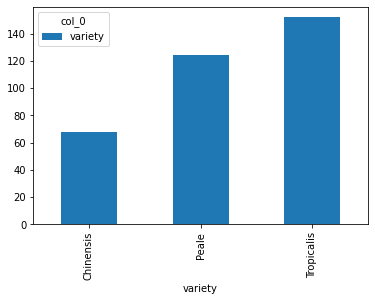

In [ ]:
var = pd.crosstab(df.variety,"variety")
var.plot.bar()

*Il y a tois variétés différentes de dauphins.*

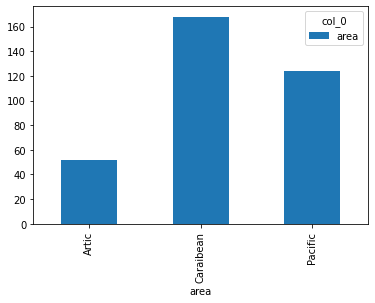

In [ ]:
area = pd.crosstab(df.area,"area")
area.plot.bar()

*Il y a tois types de lieux où sont les dauphins.*

Recherche des valeurs null ou manquante


In [ ]:
df.isnull().sum()


variety            0
area               0
dimension_1_mm     2
dimension_2_mm     2
dimension_3_mm     2
mass_g             2
sex               10
dtype: int64

On peut constater qu'il il y deux valeurs manquantes ou null dans les colonnes dimension_1_mm, dimension_2_mm, dimension_3_mm et mass_g. 
Dans la colonnes sex, il manques 10 valeurs.

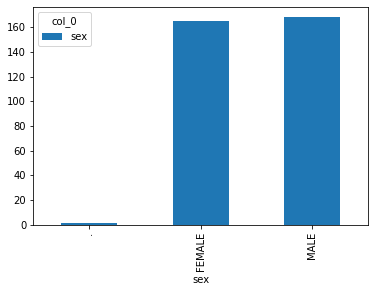

In [ ]:
colS = pd.crosstab(df.sex,"sex")
#Comparaison de la colonne sexe. Pour faire le choix des valeurs manquantes ou nulls.
colS.plot.bar()

# Pré-processing


Valeurs manquantes, encodages des données.
la normalisation

* Pour le traitement des valeurs null j'ai choisi de remplacer les valeurs numériques par la médiane.
* Pour le traitement des valeurs de la colonne "sex", je décide de faire un mode qui va remplacer les valeurs manquantes par la valeur la plus courante. Qui est en l'occurrence 'Male'.

In [ ]:
median= df["dimension_1_mm"].median()
median1= df["dimension_2_mm"].median()
median2= df["dimension_3_mm"].median()
median3= df["mass_g"].median()
mode = df["sex"].mode().values[0]

df["dimension_1_mm"].replace(np.nan,median,inplace=True)
df["dimension_2_mm"].replace(np.nan,median1,inplace=True)
df["dimension_3_mm"].replace(np.nan,median2,inplace=True)
df["mass_g"].replace(np.nan,median3,inplace=True)
df["sex"] = df["sex"].replace(np.NaN, mode)

In [ ]:
# Vérification des changements des valeurs des colonnes.
df.isnull().sum()

variety           0
area              0
dimension_1_mm    0
dimension_2_mm    0
dimension_3_mm    0
mass_g            0
sex               0
dtype: int64

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
# Mise en place de l'ordinal encoding
encoder = OrdinalEncoder()
# J'effectue l'encodage des colonnes 'variety','area','sex' avec la methode fit_trasform
df['variety'] = encoder.fit_transform(df[['variety']])
df['area'] = encoder.fit_transform(df[['area']])
df['sex'] = encoder.fit_transform(df[['sex']])

In [ ]:
#Vérification de l'encodage
df

,variety,area,dimension_1_mm,dimension_2_mm,dimension_3_mm,mass_g,sex
0,2.0,0.0,39.10,18.7,181.0,3750.0,2.0
1,2.0,0.0,39.50,17.4,186.0,3800.0,1.0
2,2.0,0.0,40.30,18.0,195.0,3250.0,1.0
3,2.0,0.0,44.45,17.3,197.0,4050.0,2.0
4,2.0,0.0,36.70,19.3,193.0,3450.0,1.0
...,...,...,...,...,...,...,...
339,1.0,1.0,44.45,17.3,197.0,4050.0,2.0
340,1.0,1.0,46.80,14.3,215.0,4850.0,1.0
341,1.0,1.0,50.40,15.7,222.0,5750.0,2.0
342,1.0,1.0,45.20,14.8,212.0,5200.0,1.0


Feature processing


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe_encod = OneHotEncoder(sparse = False)

In [ ]:
X = df[['area','dimension_1_mm', 'dimension_2_mm','dimension_3_mm','mass_g','sex']]
X = ohe_encod.fit_transform(X)
Y = df['variety']

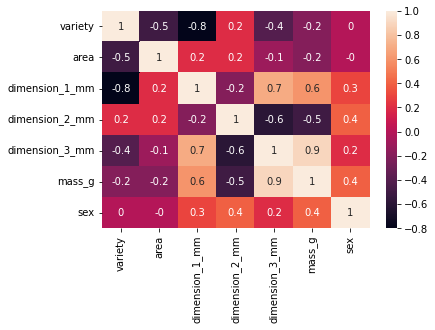

In [ ]:
matrice_corr = df.corr().round(1)
sns.heatmap(data=matrice_corr, annot=True)

# Modèle de prédiction


In [ ]:
#librairies machine learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5, stratify =Y)

 KNeightborsClassifier


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
a = model.score(X_train, Y_train)
print('le score est de :',a)

le score est de : 0.8981818181818182


In [ ]:
# Métrique d'erreur
from sklearn.metrics import mean_squared_error

prediction = model.predict(X_test)
mean_squared_error(Y_test, prediction)
print("Résultat du MSE :", round(np.sqrt(mean_squared_error(Y_test, prediction)), 2))

Résultat du MSE : 0.85


In [ ]:
#Paramètre du KNN
parameters = {'n_neighbors': range(1, 21)}

In [ ]:
from sklearn.model_selection import GridSearchCV

# Mise en place du grid search
grid = GridSearchCV(model, parameters, cv = 5, n_jobs =-1, verbose = 1)

In [ ]:
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 21)}, verbose=1)

In [ ]:
grid.best_score_

0.8145454545454547

In [ ]:
grid.best_params_

{'n_neighbors': 1}

In [ ]:
grid.cv_results_['params']

[{'n_neighbors': 1},
 {'n_neighbors': 2},
 {'n_neighbors': 3},
 {'n_neighbors': 4},
 {'n_neighbors': 5},
 {'n_neighbors': 6},
 {'n_neighbors': 7},
 {'n_neighbors': 8},
 {'n_neighbors': 9},
 {'n_neighbors': 10},
 {'n_neighbors': 11},
 {'n_neighbors': 12},
 {'n_neighbors': 13},
 {'n_neighbors': 14},
 {'n_neighbors': 15},
 {'n_neighbors': 16},
 {'n_neighbors': 17},
 {'n_neighbors': 18},
 {'n_neighbors': 19},
 {'n_neighbors': 20}]

In [ ]:
list_params = grid.cv_results_['params']
list_params

[{'n_neighbors': 1},
 {'n_neighbors': 2},
 {'n_neighbors': 3},
 {'n_neighbors': 4},
 {'n_neighbors': 5},
 {'n_neighbors': 6},
 {'n_neighbors': 7},
 {'n_neighbors': 8},
 {'n_neighbors': 9},
 {'n_neighbors': 10},
 {'n_neighbors': 11},
 {'n_neighbors': 12},
 {'n_neighbors': 13},
 {'n_neighbors': 14},
 {'n_neighbors': 15},
 {'n_neighbors': 16},
 {'n_neighbors': 17},
 {'n_neighbors': 18},
 {'n_neighbors': 19},
 {'n_neighbors': 20}]

In [ ]:
value_params = [dic['n_neighbors'] for dic in list_params]
value_params

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [ ]:
value_score = grid.cv_results_['mean_test_score']
value_score

array([0.81454545, 0.76      , 0.78545455, 0.77454545, 0.77818182,
       0.77090909, 0.75636364, 0.72727273, 0.73818182, 0.73454545,
       0.72727273, 0.73454545, 0.73090909, 0.72      , 0.71636364,
       0.72727273, 0.73454545, 0.70545455, 0.70909091, 0.70181818])

Text(0.5, 1.0, 'Paramètre d optimisation')

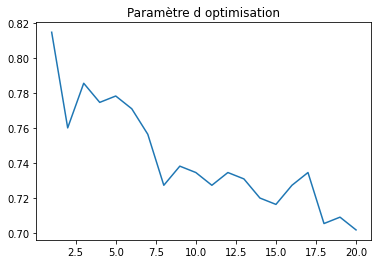

In [ ]:
sns.lineplot(x=value_params, y=value_score).set_title('Paramètre d optimisation')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('model', KNeighborsClassifier())]
    )

In [ ]:
parameters = {'model__n_neighbors': range(1, 9, 2),
              'model__weights' : ['uniform', 'distance'],
              'model__algorithm' : ['auto'],             
              'model__metric': ['euclidean', 'manhattan']}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 21)}, verbose=1)

In [ ]:
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 21)}, verbose=1)

In [ ]:
grid.best_score_

0.8145454545454547

In [ ]:
prediction = grid.predict(X_test)
mean_squared_error(Y_test, prediction)
print("Résultat du MSE :", round(np.sqrt(mean_squared_error(Y_test, prediction)), 2))

Résultat du MSE : 0.85


Je suis désolée, j'ai compris ce que j'ai effectué dans mes démarches, mais manque de temps pour moi.
Je n'es malheureusement pas eut le temps de tout faire commme je le voulais.
Et faire un document propre avec des fonctions, plus de graphiques et d'explication.

J'ai au moins un score à présenter c'est déjà pas si mal..
